In [1]:
import params
import curveTreeDB
from google.cloud import datastore, storage, logging
import time
import pickle

In [2]:
def getDiscoveredPortfolios():
    while True:
        try:
            datastore_client = datastore.Client('money-maker-1236')
            query = datastore_client.query(kind=params.discoveredPortfolios)
            retrievedModels = list(query.fetch())
            return retrievedModels
        except:
            time.sleep(10)
            print("DATA SOURCE RETRIEVAL ERROR:", str(sys.exc_info()))

In [3]:
portfolios = getDiscoveredPortfolios()

In [4]:
len(portfolios)

1623

In [39]:
import pandas as pd
cleanedModels = []
for item in portfolios:
    try:
        print(item["IS_profitability"])
    except:
        continue
    if item["IS_profitability"] < 0.51:
        continue
    if item["portfolioType"].startswith("HRP") == False:
        continue
    newItem = {}
    for key in item:
        newItem[key] = item[key]
    
    itemKeys= list(newItem.keys())
    tickers = []
    for key in itemKeys:
        
        if (key.startswith("OOS") and key != "OOS_profitability" and key != "OOS_annualizedReturn" \
            and key != "OOS_free return" and key != "OOS_annualizedVolatility" and key != "OOS_beta"):
            del newItem[key]
        if len(key) == 3 or key == "SOXX" or key == "benchmark" or key == "IS_benchmark":
            del newItem[key]
            if len(key) == 3 or key == "SOXX":
                tickers.append(key)
    newItem["key"] = item.key.name
    newItem["tickers"] = tickers
    cleanedModels.append(newItem)


0.5584965590259396
0.5590259396506088
0.5595553202752779
0.5542615140285866
0.5616728427739545
0.5611434621492853
0.5622022233986236
0.5437392795883362
0.5512082853855006
0.5632609846479619
0.5569084171519323
0.5563790365272631
0.5606140815246162
0.5616728427739545
0.5611434621492853
0.5558496559025939
0.544882790165809
0.5616728427739545
0.5632609846479619
0.5643197458973002
0.5518030910131654
0.5558496559025939
0.5595553202752779
0.5616728427739545
0.5600847008999471
0.5414997137950772
0.5627316040232927
0.5616728427739545
0.5627316040232927
0.5611434621492853
0.5595553202752779
0.5523156089193825
0.5627316040232927
0.5653785071466384
0.5616728427739545
0.5600847008999471
0.5563866513233602
0.5546651402404121
0.5356731875719217
0.5595553202752779
0.5622022233986236
0.5669666490206459
0.5526733721545791
0.5611434621492853
0.5627316040232927
0.5627316040232927
0.5680254102699841
0.5595553202752779
0.5452620434092113
0.5574377977766014
0.5648491265219693
0.5590259396506088
0.55532027527

In [40]:
cleanedModels[0]


{'ALGORITHMS TRADED': 123,
 'IS_alpha': 0.09414117169606463,
 'IS_annualizedReturn': 0.19995159461275414,
 'IS_annualizedVolatility': 0.14161020848422803,
 'IS_beta': 0.6782350043402993,
 'IS_free return': 0.0583413861285261,
 'IS_profitability': 0.5437392795883362,
 'IS_rollingSharpeError': 0.844012093820749,
 'IS_rollingSharpeMinimum': -0.7397951601797311,
 'IS_sharpe': 1.3584528735567465,
 'IS_sharpe difference': 0.901472382731586,
 'IS_stability': 0.9282522619559728,
 'OOS_annualizedReturn': 0.09214147171124076,
 'OOS_annualizedVolatility': 0.09643163602559617,
 'OOS_beta': 1.063602398178516,
 'OOS_free return': -0.004290164314355402,
 'OOS_profitability': 0.5436507936507936,
 'TICKERS TRADED': 24,
 'description': 'AUTO GENERATED',
 'key': '00fdd1584381a23af3f87cbf423fd4a3658adbd31be30c5158f0d544',
 'portfolioType': 'HRP WINDOW',
 'startedTrading': datetime.datetime(2017, 8, 30, 0, 0, tzinfo=<UTC>),
 'tickers': ['IWM',
  'SLV',
  'IYT',
  'XME',
  'XLI',
  'IVW',
  'XRT',
  'XBI',


ALGORITHMS TRADED OOS_profitability


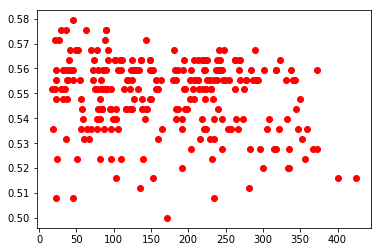

ALGORITHMS TRADED OOS_annualizedReturn


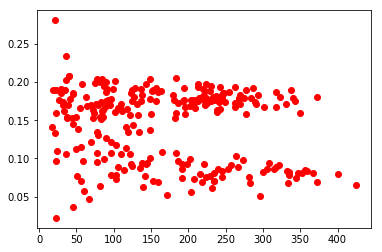

ALGORITHMS TRADED OOS_free return


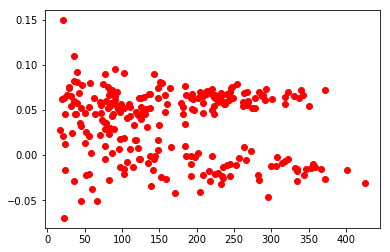

IS_alpha OOS_profitability


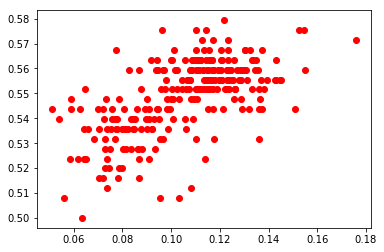

IS_alpha OOS_annualizedReturn


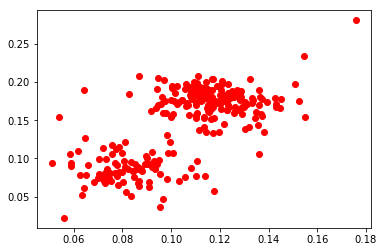

IS_alpha OOS_free return


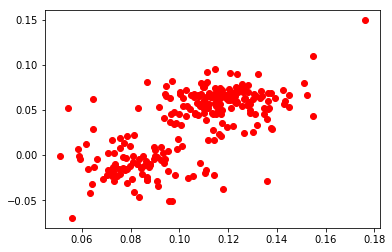

IS_annualizedReturn OOS_profitability


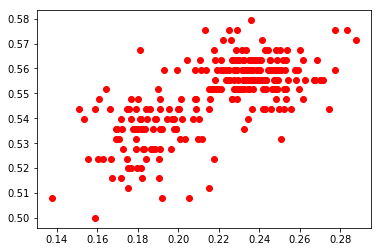

IS_annualizedReturn OOS_annualizedReturn


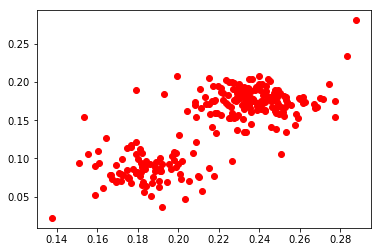

IS_annualizedReturn OOS_free return


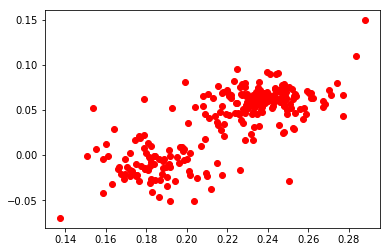

IS_annualizedVolatility OOS_profitability


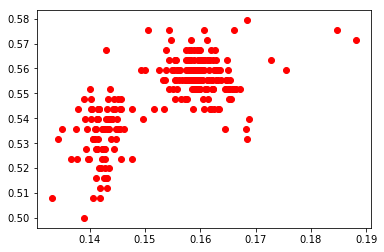

IS_annualizedVolatility OOS_annualizedReturn


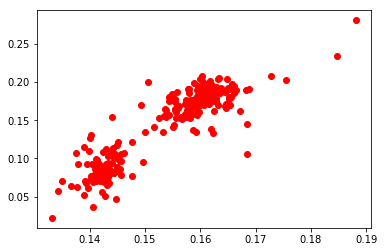

IS_annualizedVolatility OOS_free return


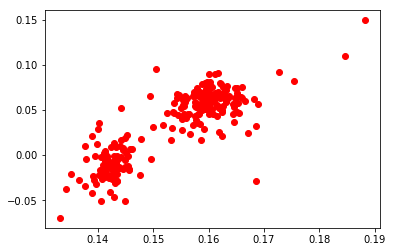

IS_beta OOS_profitability


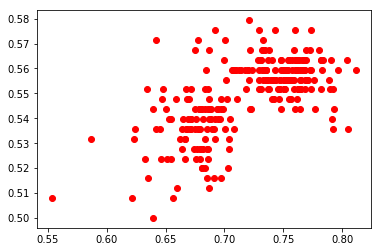

IS_beta OOS_annualizedReturn


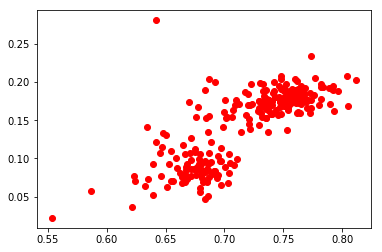

IS_beta OOS_free return


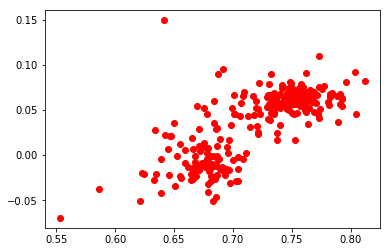

IS_free return OOS_profitability


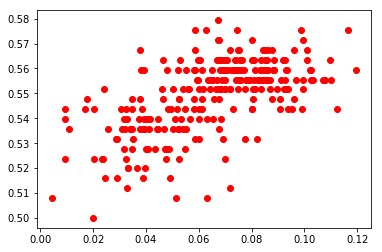

IS_free return OOS_annualizedReturn


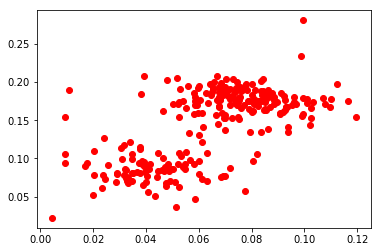

IS_free return OOS_free return


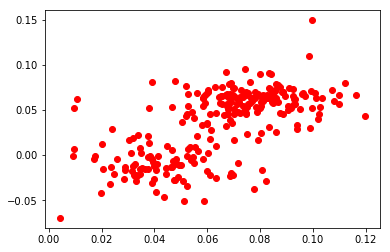

IS_profitability OOS_profitability


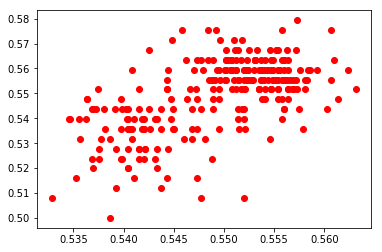

IS_profitability OOS_annualizedReturn


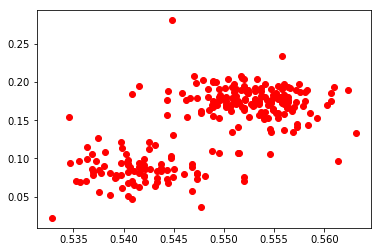

IS_profitability OOS_free return


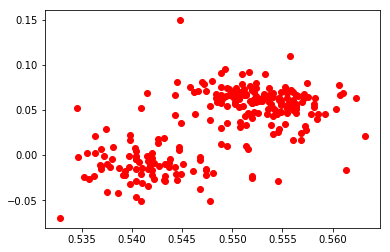

IS_rollingSharpeError OOS_profitability


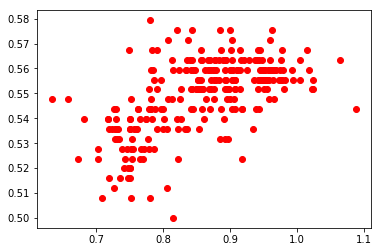

IS_rollingSharpeError OOS_annualizedReturn


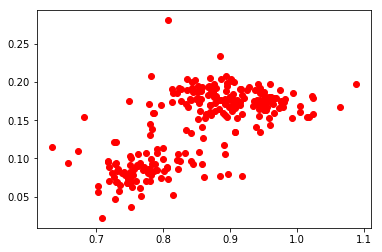

IS_rollingSharpeError OOS_free return


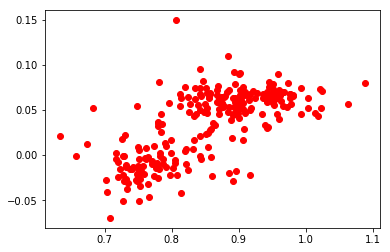

IS_rollingSharpeMinimum OOS_profitability


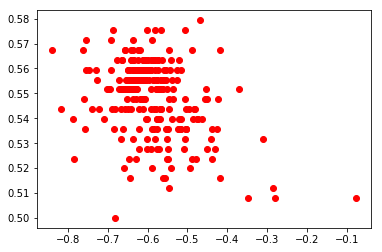

IS_rollingSharpeMinimum OOS_annualizedReturn


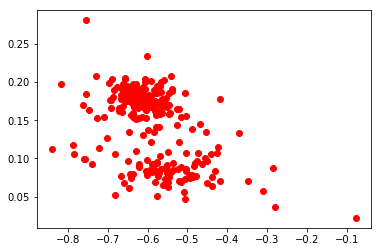

IS_rollingSharpeMinimum OOS_free return


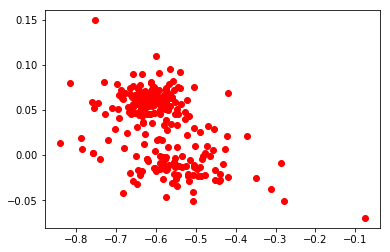

IS_sharpe OOS_profitability


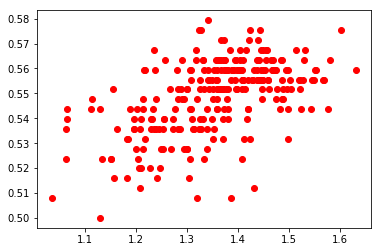

IS_sharpe OOS_annualizedReturn


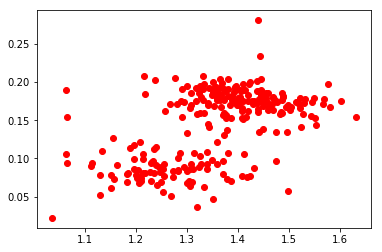

IS_sharpe OOS_free return


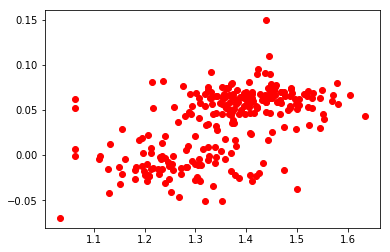

IS_sharpe difference OOS_profitability


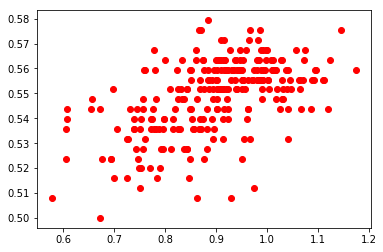

IS_sharpe difference OOS_annualizedReturn


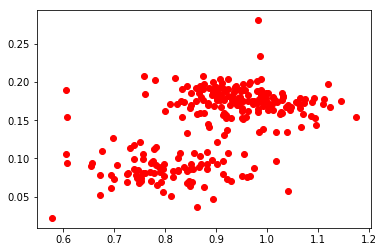

IS_sharpe difference OOS_free return


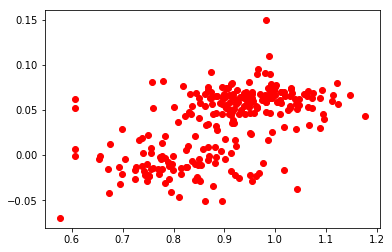

IS_stability OOS_profitability


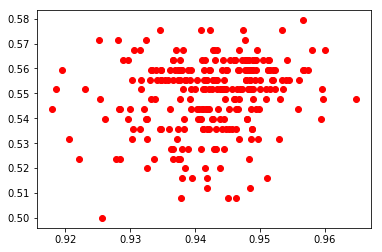

IS_stability OOS_annualizedReturn


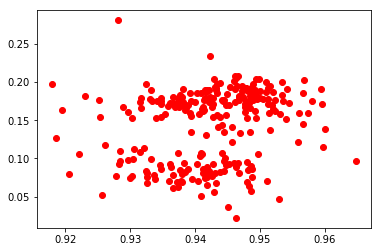

IS_stability OOS_free return


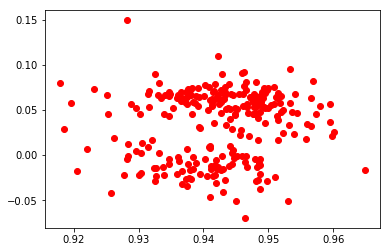

OOS_annualizedReturn OOS_profitability


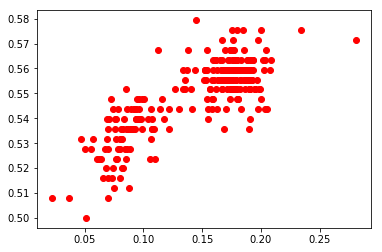

OOS_annualizedReturn OOS_annualizedReturn


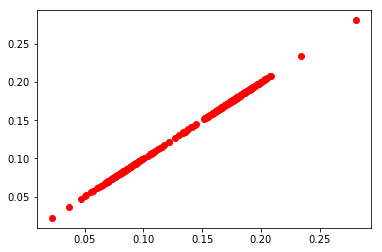

OOS_annualizedReturn OOS_free return


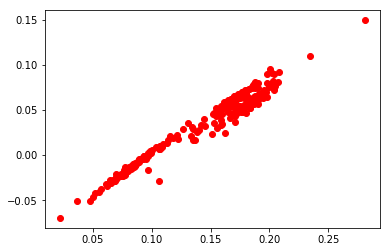

OOS_free return OOS_profitability


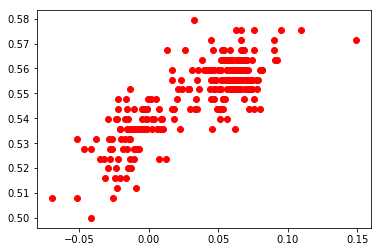

OOS_free return OOS_annualizedReturn


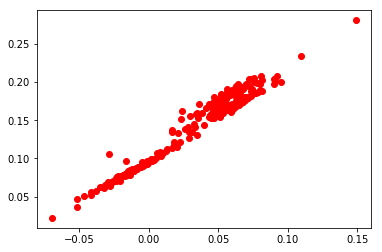

OOS_free return OOS_free return


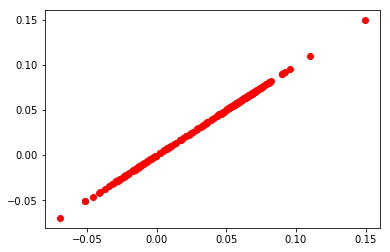

OOS_profitability OOS_profitability


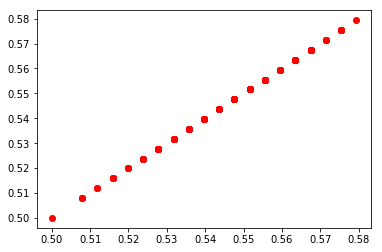

OOS_profitability OOS_annualizedReturn


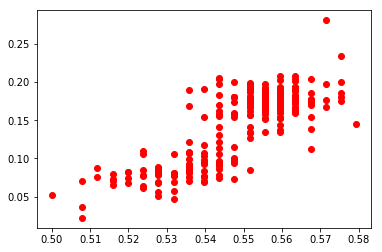

OOS_profitability OOS_free return


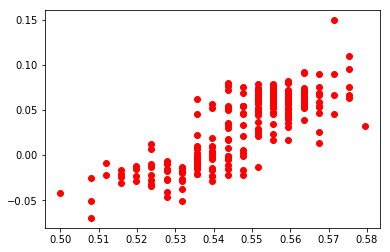

TICKERS TRADED OOS_profitability


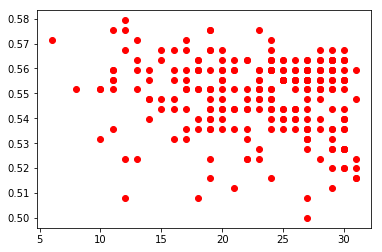

TICKERS TRADED OOS_annualizedReturn


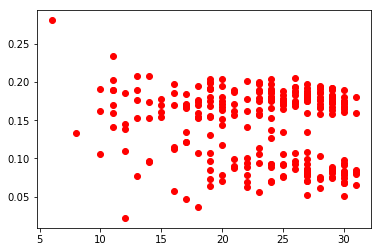

TICKERS TRADED OOS_free return


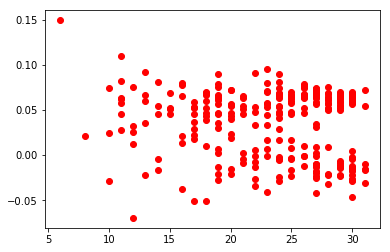

VO
True    0.546606
Name: OOS_profitability, dtype: float64
VO
True    0.136489
Name: OOS_annualizedReturn, dtype: float64
VO
True    0.029182
Name: OOS_free return, dtype: float64
VO OOS_profitability


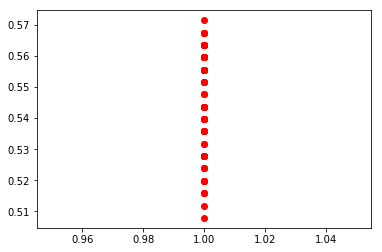

VO OOS_annualizedReturn


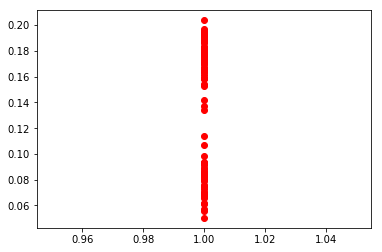

VO OOS_free return


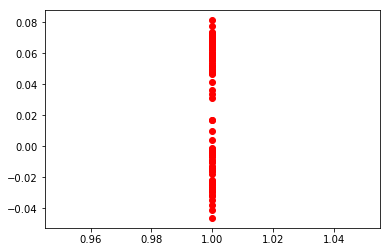

description
AUTO GENERATED    0.548967
Name: OOS_profitability, dtype: float64
description
AUTO GENERATED    0.144399
Name: OOS_annualizedReturn, dtype: float64
description
AUTO GENERATED    0.03482
Name: OOS_free return, dtype: float64
description OOS_profitability
key OOS_profitability
portfolioType
HRP BINARY    0.555458
HRP FULL      0.559073
HRP WINDOW    0.533245
Name: OOS_profitability, dtype: float64
portfolioType
HRP BINARY    0.177473
HRP FULL      0.173978
HRP WINDOW    0.085711
Name: OOS_annualizedReturn, dtype: float64
portfolioType
HRP BINARY    0.052823
HRP FULL      0.064483
HRP WINDOW   -0.010386
Name: OOS_free return, dtype: float64
portfolioType OOS_profitability
startedTrading
2017-08-29 00:00:00+00:00    0.550441
2017-08-30 00:00:00+00:00    0.548657
Name: OOS_profitability, dtype: float64
startedTrading
2017-08-29 00:00:00+00:00    0.144922
2017-08-30 00:00:00+00:00    0.144290
Name: OOS_annualizedReturn, dtype: float64
startedTrading
2017-08-29 00:00:00+00:00    

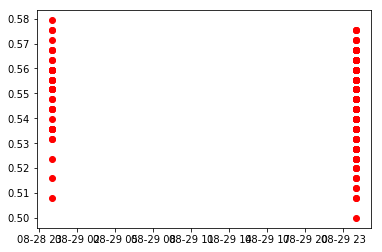

startedTrading OOS_annualizedReturn


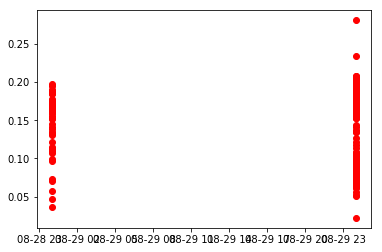

startedTrading OOS_free return


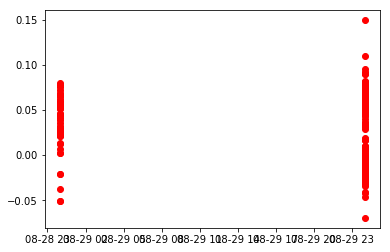

In [76]:
cm = pd.DataFrame(cleanedModels)
for col in cm.columns.values:
    if col == "tickers":
        continue
    try:
        import matplotlib.pyplot as plt
        groupsSharpe = cm.groupby([col])["OOS_profitability"].mean()
        if len(groupsSharpe) < 20:
            print(groupsSharpe)
            groupsSharpe = cm.groupby([col])["OOS_annualizedReturn"].mean()
            print(groupsSharpe)
            groupsSharpe = cm.groupby([col])["OOS_free return"].mean()
            print(groupsSharpe)
            
        print(col, "OOS_profitability")
        xVals = cm[[col]].values
        yVals = cm[["OOS_profitability"]].values
        plt.plot(xVals, yVals, 'ro')
        plt.show()
        
        print(col, "OOS_annualizedReturn")
        xVals = cm[[col]].values
        yVals = cm[["OOS_annualizedReturn"]].values
        plt.plot(xVals, yVals, 'ro')
        plt.show()
        
        print(col, "OOS_free return")
        xVals = cm[[col]].values
        yVals = cm[["OOS_free return"]].values
        plt.plot(xVals, yVals, 'ro')
        plt.show()
        plt.draw()
    except:
        continue
    



In [10]:
import dataAck
tData = dataAck.getTrainingData(params.tickerDataLookup)
joinedData = tData[0]

ATTEMPTING PULL ALL_TICKERS


In [11]:
def getDiscoveredPortfolioData(portfolioKey):
    storageClient = storage.Client('money-maker-1236')
    while True:
        try:
            bucket = storageClient.get_bucket(params.discoveredPortfolioCache)
            print("ATTEMPTING PULL", portfolioKey)
            blob = storage.Blob(portfolioKey, bucket)
            return pickle.loads(blob.download_as_string())
        except:
            return None
    pass

In [34]:
import empyrical
import dataAck
import portfolioGeneration
def getLimitedDataForPortfolio(tickerAllocationsTable, joinedData, factorToTrade= "VTI"):
    
    rawTickerPerformance = portfolioGeneration.calculatePerformanceForTable(tickerAllocationsTable, tickerAllocationsTable.columns, joinedData)
    
    rawTickerPerformance = rawTickerPerformance[~rawTickerPerformance.index.duplicated(keep='first')]
    

    rawAlgoPerformance = pd.DataFrame(rawTickerPerformance.apply(lambda x:sum(x), axis=1), columns=["Algo Return Without Commissions"])

    tickerPerformance, algoPerformance, algoTransactionCost =  portfolioGeneration.calculatePerformanceForAllocations(tickerAllocationsTable, joinedData)

    benchmark = factorToTrade
    factorReturn = dataAck.getDailyFactorReturn(benchmark, joinedData)
    factorReturn.columns = ["Factor Return (" + benchmark + ")"]
    algoPerformance.columns = ["Algo Return"]
    
    algoPerformanceRollingWeekly = algoPerformance.rolling(5, min_periods=5).apply(lambda x:empyrical.cum_returns(x)[-1]).dropna()
    algoPerformanceRollingWeekly.columns = ["Weekly Rolling Performance"]
    
    algoPerformanceRollingMonthly = algoPerformance.rolling(22, min_periods=22).apply(lambda x:empyrical.cum_returns(x)[-1]).dropna()
    algoPerformanceRollingMonthly.columns = ["Monthly Rolling Performance"]
    
    algoPerformanceRollingYearly = algoPerformance.rolling(252, min_periods=252).apply(lambda x:empyrical.cum_returns(x)[-1]).dropna()
    algoPerformanceRollingYearly.columns = ["Yearly Rolling Performance"]
    
    
    
    
    return algoPerformance.join(factorReturn), algoPerformanceRollingWeekly, algoPerformanceRollingMonthly, algoPerformanceRollingYearly

HRP FULL 77 17
IS 0.6857928055650335 0.5546651402404121 0.2531628688162253 0.15923770919899286
OOS 1.1058655103102562 0.5515873015873016 0.13504020954995366 0.10588814485136286
ATTEMPTING PULL 042ac161f5f2164282aa22039347a01753747506377d2c1a513ab255
Weekly -0.0912370841023 0.00451380563255 0.102110952469
Monthly -0.107514634622 0.0203248005185 0.152905228529
Yearly -0.124107130356 0.245642892397 0.707405378168


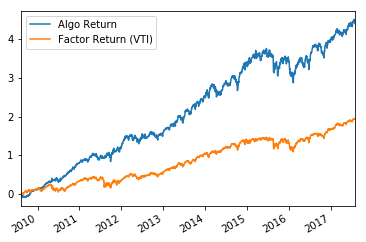

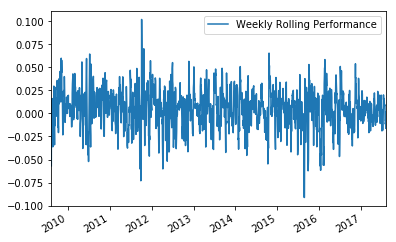

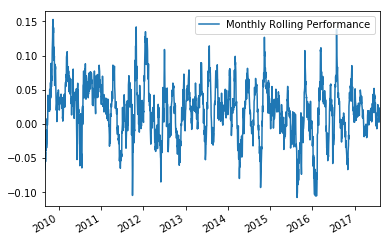

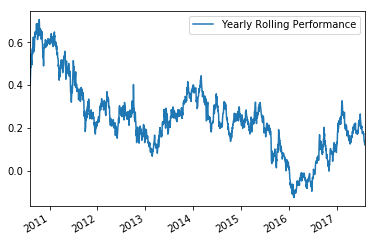

HRP FULL 102 15
IS 0.6996746427632197 0.5540927303949628 0.25150709642354796 0.1596885181495858
OOS 1.18079784507019 0.5634920634920635 0.1613330278598497 0.10936259664643339
ATTEMPTING PULL 07b3ea1a1279ae9ed5d599c6808b88735ad1e4971d2a43f031b6017f
Weekly -0.102634451224 0.00454461030819 0.0966643643343
Monthly -0.13293640059 0.020246402048 0.139928640788
Yearly -0.170403585145 0.255742102764 0.712196129226


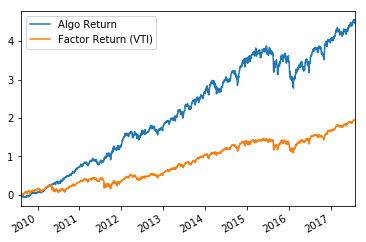

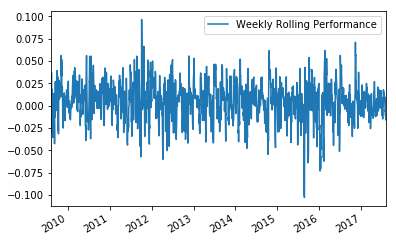

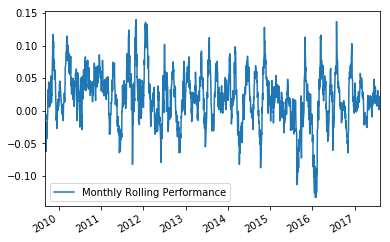

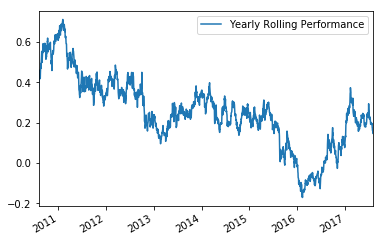

HRP FULL 90 23
IS 0.6918451522288508 0.5492554410080184 0.22491716171326392 0.15056396643231001
OOS 1.1469605064056139 0.5753968253968254 0.20026736220840258 0.10493681952892923
ATTEMPTING PULL 27a9fb382f279de3717be7c685488b7e6b85e5766b8170fc63df9f48
Weekly -0.0987658456382 0.00414831536586 0.0888073048592
Monthly -0.120259300049 0.0187185986095 0.138740959842
Yearly -0.14653503878 0.229197474583 0.542329983376


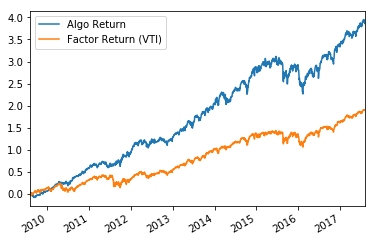

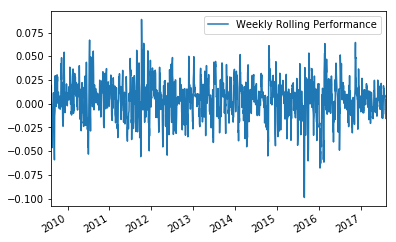

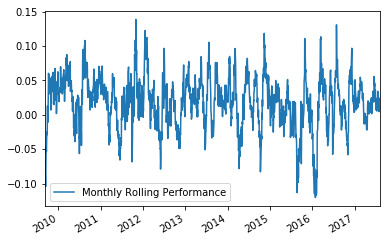

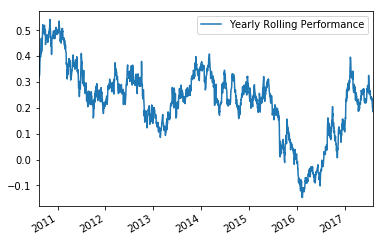

HRP BINARY 44 13
IS 0.6843800596064296 0.5495134516313681 0.22751281404014123 0.15806548922092026
OOS 1.174211257222961 0.5595238095238095 0.15269179042210457 0.11701929757018026
ATTEMPTING PULL 2a686ca47fd60795a569731908eb08e338ef02aeba9935c0bf6c7d54
Weekly -0.0995293551903 0.00412574122544 0.0984642505286
Monthly -0.143880457992 0.0184365271098 0.146706354184
Yearly -0.165371380399 0.226747624758 0.557107463934


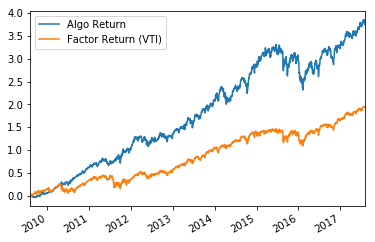

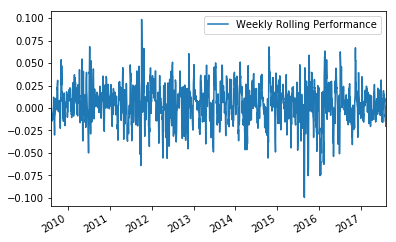

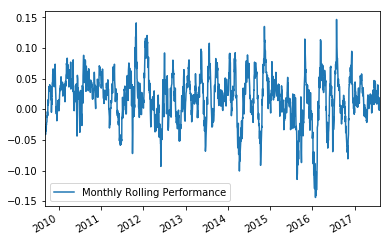

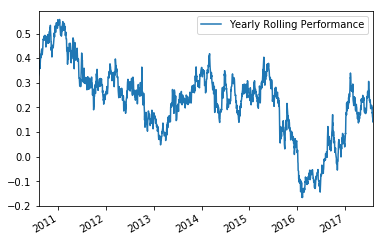

HRP FULL 116 21
IS 0.6983665583926337 0.5513856812933026 0.2455705528568275 0.15171294899317017
OOS 1.1620379466828492 0.5436507936507936 0.1416292213178234 0.10816525384027831
ATTEMPTING PULL 315ee1c9691e01d6da3edfd096eec54be1192373a612bd33fd1982b3
Weekly -0.0977846992837 0.00438546823243 0.0886977418893
Monthly -0.12805535669 0.0195065238965 0.135822750054
Yearly -0.148487245416 0.233896989104 0.590260574942


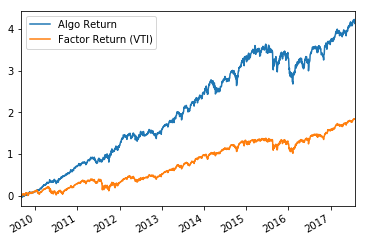

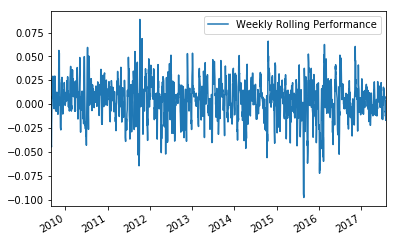

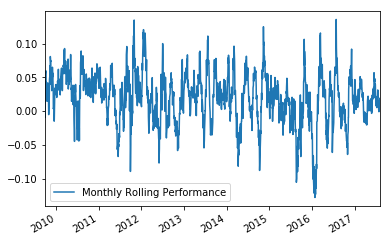

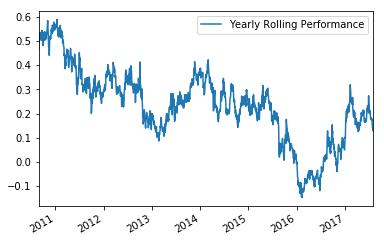

HRP BINARY 88 17
IS 0.6776542810462027 0.5518030910131654 0.22584689950491632 0.15832166670571368
OOS 1.1791617953658926 0.5714285714285714 0.16704975250330678 0.1219427084937336
ATTEMPTING PULL 46b08511a803f0b307c1b74224492d9968417b783be34dd987030824
Weekly -0.0913027025848 0.00413095496352 0.101626913912
Monthly -0.141590048348 0.0184176411508 0.150817612048
Yearly -0.152003536384 0.223092430979 0.553249394366


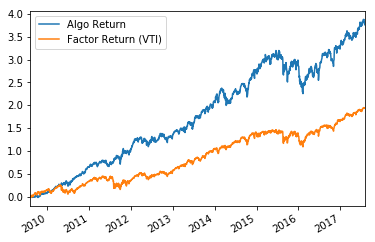

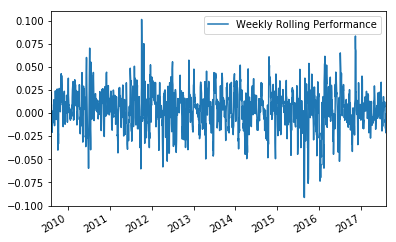

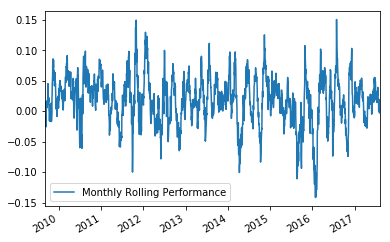

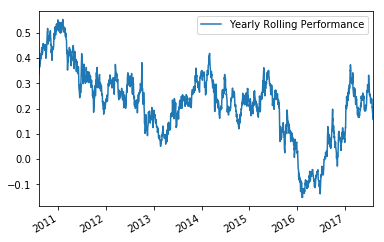

HRP BINARY 23 14
IS 0.6969302194865148 0.5613234455219623 0.22633855143029624 0.1456808446337541
OOS 1.1350171249371597 0.5476190476190477 0.0967132901910368 0.1127806649194426
ATTEMPTING PULL 4f7d9b214356d86e6f8108e6833b44831b76141ec43a57b95bf9c9f6
Weekly -0.0933165660314 0.00393388368432 0.0935826050185
Monthly -0.11251497541 0.0173722421629 0.137569389292
Yearly -0.131008670154 0.208637283672 0.432499414972


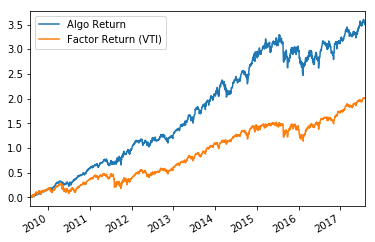

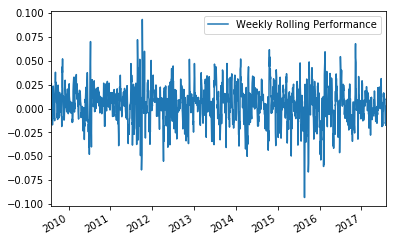

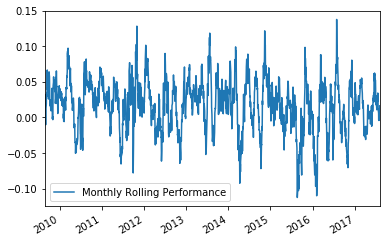

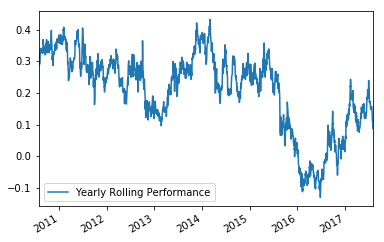

HRP BINARY 17 11
IS 0.6337598228732494 0.5573302909298345 0.21673234852969547 0.15511164365530128
OOS 1.149165260903823 0.5515873015873016 0.14062293472206866 0.11258451214916448
ATTEMPTING PULL 6288079d21f4d23179a7d86457087deb746e44e01a2584c07e949188
Weekly -0.0800200834213 0.00393069727028 0.103405598265
Monthly -0.154341220018 0.0173503767949 0.156045270087
Yearly -0.144566344229 0.205142124375 0.535194217576


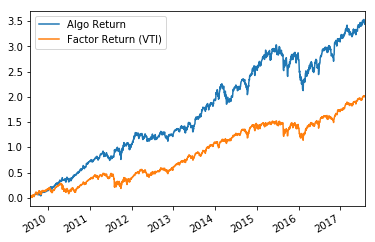

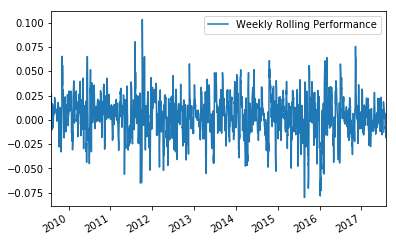

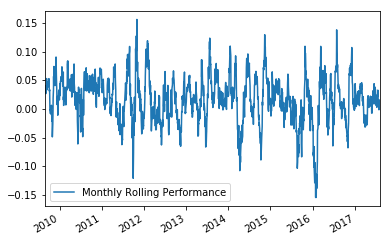

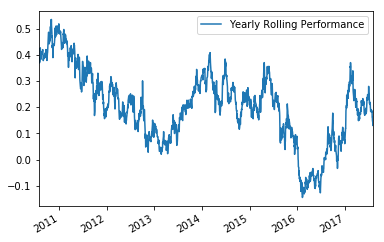

HRP BINARY 32 14
IS 0.6696123870264022 0.5558099599313108 0.208027388457261 0.1554702119348429
OOS 1.1966665610926976 0.5476190476190477 0.17347561143816903 0.119644858272815
ATTEMPTING PULL 99bae6eb3e4a0e74ed8352fd7b03039e81bdfca703ee200ba7786673
Weekly -0.0910054098989 0.00388329836156 0.103312509472
Monthly -0.144104096632 0.0172553371765 0.155789238787
Yearly -0.164528347399 0.209943963793 0.479953248046


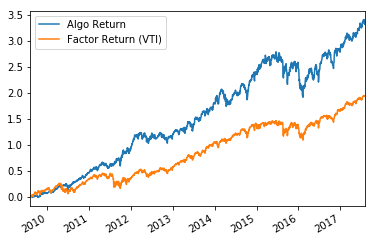

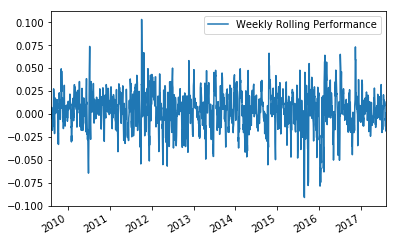

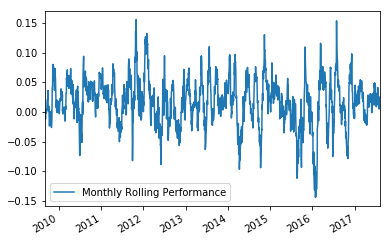

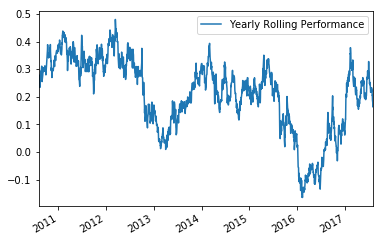

HRP BINARY 84 19
IS 0.6865168876200429 0.548885077186964 0.2523044160449899 0.15334814911252748
OOS 1.2317072241457319 0.5436507936507936 0.1551780570578729 0.12538031579983977
ATTEMPTING PULL b2fb23ace025db752fe0bc40f653a359d5daec2ed121d3140e312066
Weekly -0.0904835137298 0.00448537031898 0.112293524624
Monthly -0.1329444569 0.019957526592 0.172171888125
Yearly -0.138589306753 0.242762744998 0.618226873524


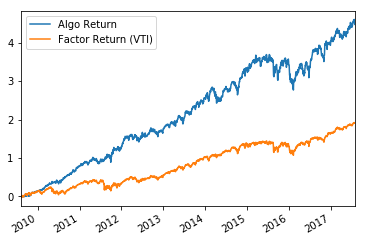

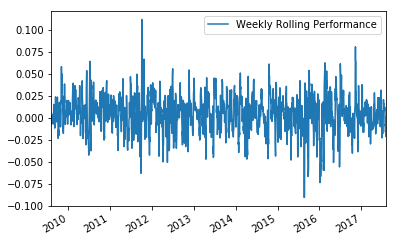

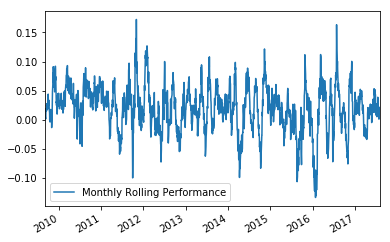

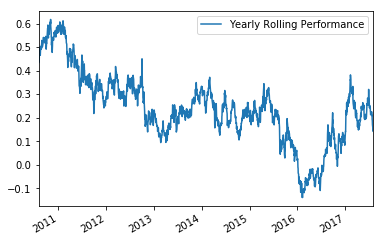

HRP FULL 21 6
IS 0.6417159209983628 0.5448315248429468 0.2877475121731723 0.18817358001343448
OOS 1.3155933568778604 0.5714285714285714 0.28092762547560834 0.13169745379084521
ATTEMPTING PULL cd44f9a8b48c79889277aabbd023a23f0563a9edbe10c1651f488f94
Weekly -0.107571652764 0.00528128365492 0.133810696201
Monthly -0.150760507707 0.0230098257989 0.168666778746
Yearly -0.208355486844 0.268943571202 0.870263753713


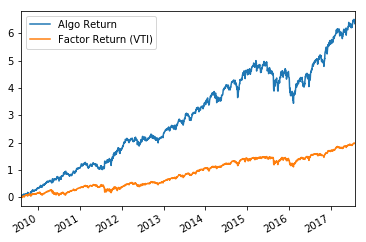

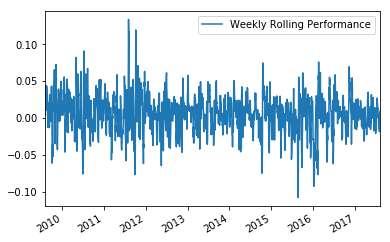

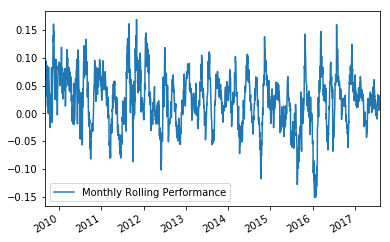

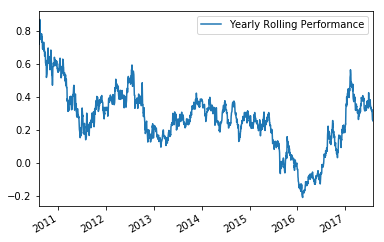

HRP BINARY 21 8
IS 0.6475942366632792 0.5631789594053745 0.21857091726363986 0.16231906417627556
OOS 1.0517702176534411 0.5515873015873016 0.13339553955758632 0.11245900453376093
ATTEMPTING PULL d8ae10bdc90e44a672f0ec30a884f27591edabbb66cb7d69e53c3a5e
Weekly -0.0828403340105 0.00401520412133 0.10769359213
Monthly -0.146791639191 0.0178744288448 0.15896769756
Yearly -0.115359044687 0.210490910383 0.527712220921


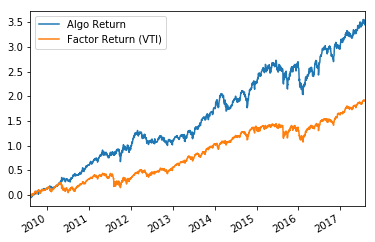

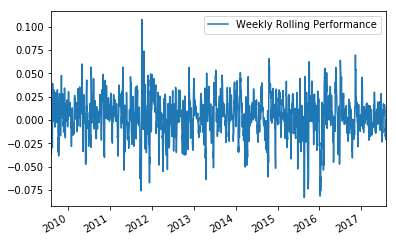

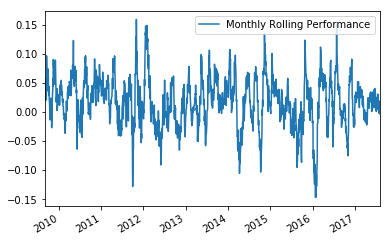

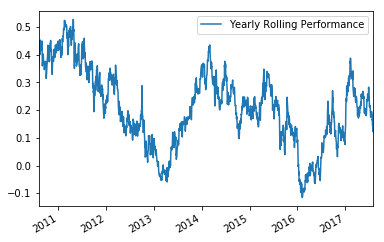

HRP FULL 77 19
IS 0.6869907045570864 0.5532646048109966 0.24421162980717792 0.160003312084458
OOS 1.2266283584580515 0.5674603174603174 0.20417767713878865 0.11405110698261552
ATTEMPTING PULL e0d19ca7b3e57d456f41ccea87e22e3cbfc62b39802b445e5b5ed9c8
Weekly -0.0997079561926 0.00448656219694 0.0938495831043
Monthly -0.142348875014 0.0194303023795 0.146515243201
Yearly -0.177696138155 0.236455372693 0.578869827252


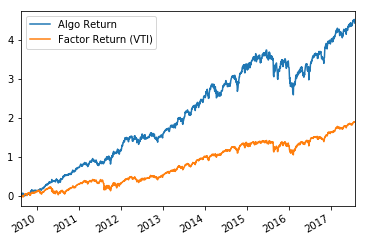

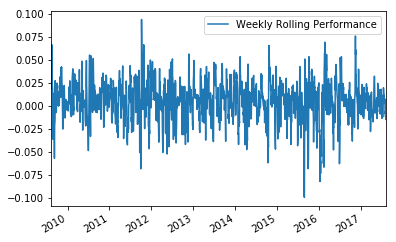

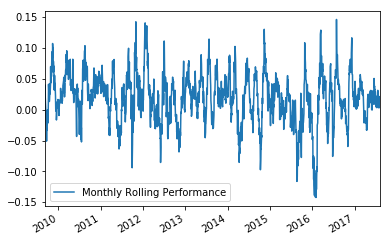

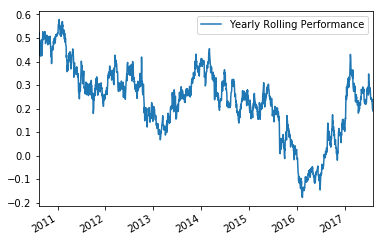

HRP BINARY 35 13
IS 0.6837215886623458 0.551743853630646 0.24774417301906104 0.16649177194429654
OOS 1.231527227068895 0.5515873015873016 0.18973795818345973 0.1294495883174693
ATTEMPTING PULL f5a811ad1eaae8ce9f80530df198abe69c12bb1dbfb24b0b17eb9b83
Weekly -0.102698699701 0.0045517436959 0.0995895076583
Monthly -0.159134247892 0.0203564183965 0.160095099982
Yearly -0.177143486208 0.236742941652 0.636895398023


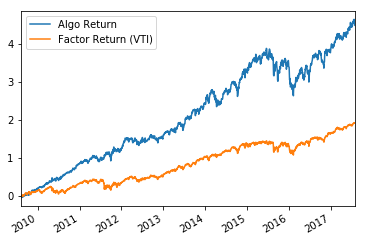

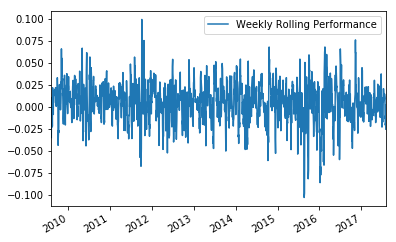

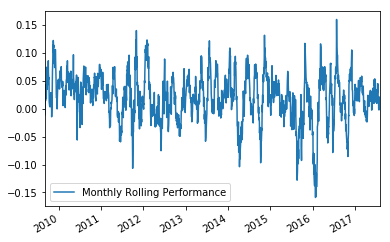

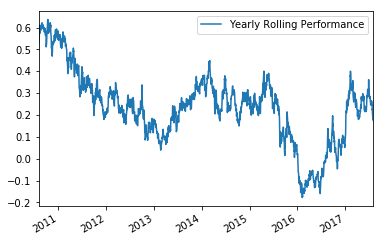

In [43]:
import matplotlib.pyplot as plt

%matplotlib inline
for mod in cleanedModels:
    if mod["IS_beta"] > 0.7:
        continue
    if mod["portfolioType"] == "HRP WINDOW":
        continue
    print(mod["portfolioType"], mod['ALGORITHMS TRADED'], len(mod['tickers']))
    print("IS", mod["IS_beta"], mod["IS_profitability"], mod["IS_annualizedReturn"], mod["IS_annualizedVolatility"])
    print("OOS", mod["OOS_beta"], mod["OOS_profitability"], mod["OOS_annualizedReturn"], mod["OOS_annualizedVolatility"])
    tickerAllocationsTable, historicalWeights, historicalPredictions = getDiscoveredPortfolioData(mod["key"])
    algoPerformance, algoPerformanceRollingWeekly, algoPerformanceRollingMonthly, algoPerformanceRollingYearly = getLimitedDataForPortfolio(tickerAllocationsTable, joinedData)
    empyrical.cum_returns(algoPerformance).plot()
    algoPerformanceRollingWeekly.plot()
    print("Weekly", algoPerformanceRollingWeekly.min().values[0], algoPerformanceRollingWeekly.mean().values[0], algoPerformanceRollingWeekly.max().values[0])
    
    algoPerformanceRollingMonthly.plot()
    print("Monthly", algoPerformanceRollingMonthly.min().values[0], algoPerformanceRollingMonthly.mean().values[0], algoPerformanceRollingMonthly.max().values[0])
    
    algoPerformanceRollingYearly.plot()
    print("Yearly", algoPerformanceRollingYearly.min().values[0], algoPerformanceRollingYearly.mean().values[0], algoPerformanceRollingYearly.max().values[0])
    
    plt.show()
    plt.draw()